## Polynominal regression

Linear exploration on none-linear data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

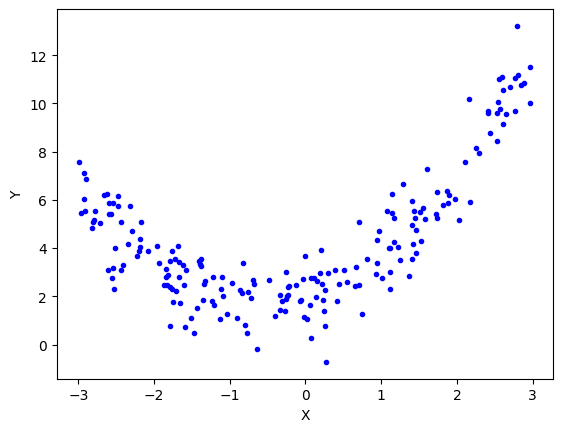

In [48]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

***
### Linear regression

0.0857811486253578


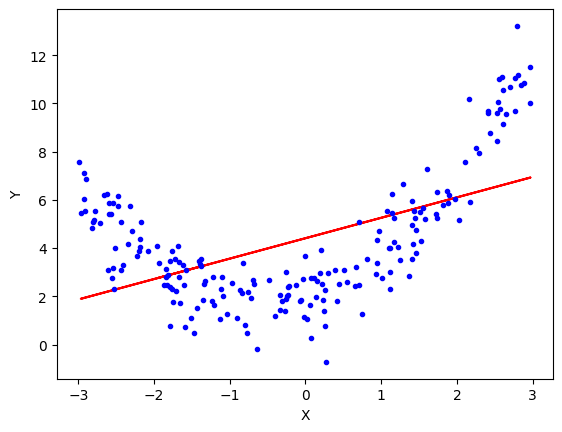

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

***
### Polynominal regression

> from sklearn.preprocess import PolynomialFeatures

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [50]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
print(f'Orignial data shape: {x_train.shape}')
print(f'Polynominal data shape: {x_train_trans.shape}')

Orignial data shape: (160, 1)
Polynominal data shape: (160, 3)


In [61]:
print(f'Sample 1: \t\t{x_train[0]}')
print(f'Transformed sample 1: \t{x_train_trans[0]}')

Sample 1: 		[-1.94099719]
Transformed sample 1: 	[ 1.         -1.94099719  3.76747009]


In [51]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8722877249755497


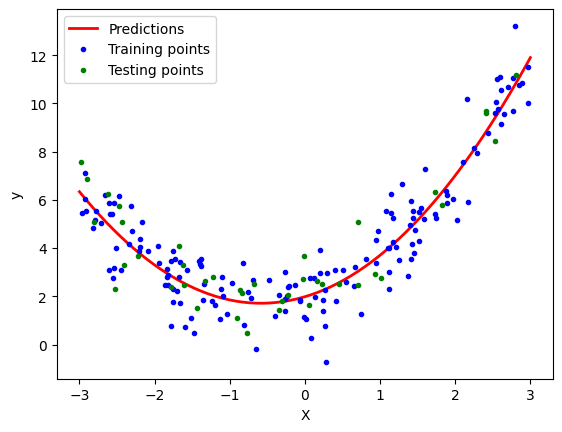

In [62]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Exploring different degrees of polonymality(?)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

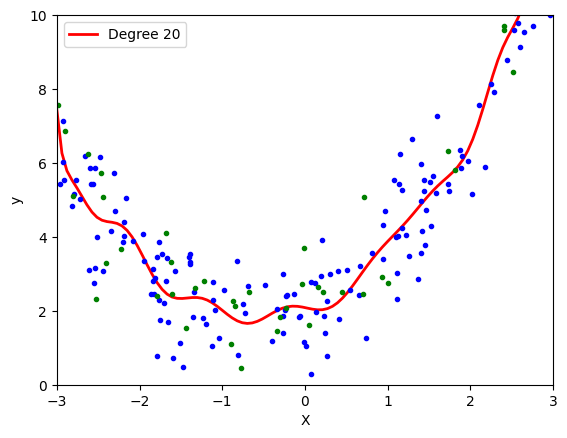

In [69]:
polynomial_regression(20)

***

Log transformation of target variable

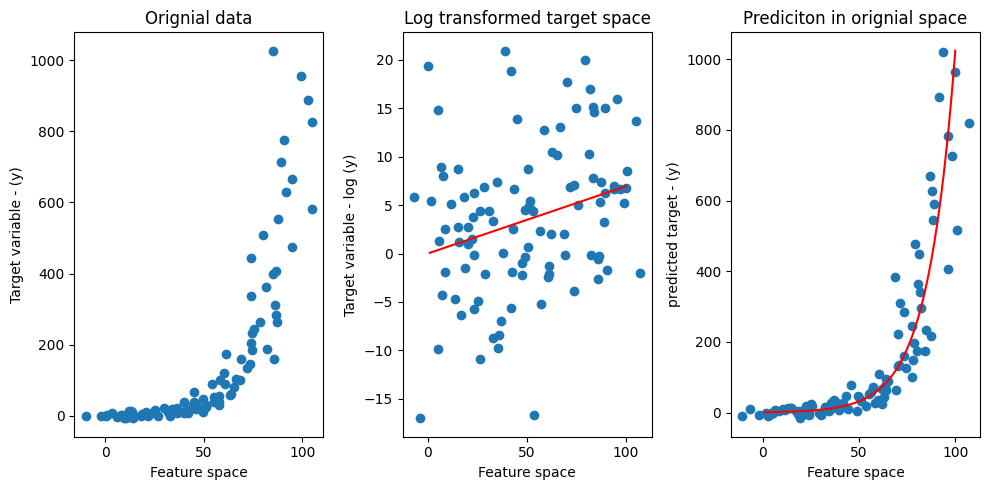

In [47]:
x = np.linspace(start=1, stop=100, num=100)
y = 2**(x/10)
y_log = np.log(y)
fig, ax = plt.subplots(1,3, figsize=(10,5))
#ax[0].plot(x, y, c='r')
ax[0].scatter(x+7*np.random.randn(x.shape[0]), y+7*np.random.randn(y.shape[0]))
ax[0].set_ylabel('Target variable - (y)')
ax[0].set_xlabel('Feature space')
ax[0].set_title('Orignial data')

ax[1].plot(x, y_log, c='r')
ax[1].scatter(x+7*np.random.randn(x.shape[0]), y_log+7*np.random.randn(y.shape[0]))
ax[1].set_ylabel('Target variable - log (y)')
ax[1].set_xlabel('Feature space')
ax[1].set_title('Log transformed target space')

ax[2].plot(x, y, c='r')
ax[2].scatter(x+7*np.random.randn(x.shape[0]), y+7*np.random.randn(y.shape[0]))
ax[2].set_ylabel('predicted target - (y)')
ax[2].set_xlabel('Feature space')
ax[2].set_title('Prediciton in orignial space')

fig.tight_layout()
plt.show()
